<a href="https://colab.research.google.com/github/Kevangi/summer-to-winter-cyclegan/blob/main/loadDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os

In [4]:
os.listdir('/content/drive')

['.shortcut-targets-by-id', 'MyDrive', '.Trash-0', '.Encrypted']

In [5]:
os.listdir('/content/drive/MyDrive')

['Summer2Winter', 'Colab Notebooks']

In [8]:
os.listdir('/content/drive/MyDrive/Summer2Winter')

['loadDataset.ipynb']

In [9]:
mkdir /content/drive/MyDrive/Summer2Winter/dataset

In [10]:
ls /content/drive/MyDrive/Summer2Winter

dataset/  loadDataset.ipynb


In [11]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kevangipatel","key":"abf434d588fdd6ab1de8e8b058632ee4"}'}

In [12]:
ls

drive/  kaggle.json  sample_data/


In [13]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [14]:
!kaggle datasets list | head

ref                                                                 title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
saidaminsaidaxmadov/chocolate-sales                                 Chocolate Sales                                         468320  2026-01-04 14:23:35.490000          19812        364  1.0              
aliiihussain/amazon-sales-dataset                                   Amazon_Sales_Dataset                                   1297759  2026-02-01 11:37:12.353000           4940         88  1.0              
aminasalamt/supply-chain-analysis-dataset                           Supply Chain Analysis Dataset                             9340  2026-02-10 12:15:16.010000            599         24

In [15]:
!kaggle datasets download -d balraj98/summer2winter-yosemite -p /content/drive/MyDrive/Summer2Winter/dataset

Dataset URL: https://www.kaggle.com/datasets/balraj98/summer2winter-yosemite
License(s): other
 78% 99.0M/126M [00:00<00:00, 324MB/s]
100% 126M/126M [00:00<00:00, 319MB/s] 


In [16]:
ls drive/MyDrive/Summer2Winter/dataset

summer2winter-yosemite.zip


In [17]:
import zipfile

In [18]:
zip_path = "/content/drive/MyDrive/Summer2Winter/dataset/summer2winter-yosemite.zip"
extract_path = "/content/drive/MyDrive/Summer2Winter/dataset"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [19]:
ls drive/MyDrive/Summer2Winter/dataset

metadata.csv  summer2winter-yosemite.zip  testA/  testB/  trainA/  trainB/


In [20]:
ls drive/MyDrive/Summer2Winter/dataset/testA/

'2010-09-07 12_23_20.jpg'  '2012-09-05 04_45_40.jpg'  '2015-06-27 13_04_51.jpg'
'2010-10-05 13_45_11.jpg'  '2012-09-10 18_45_10.jpg'  '2015-06-29 08_41_20.jpg'
'2010-10-05 19_08_31.jpg'  '2012-09-15 12_40_30.jpg'  '2015-06-29 14_59_01.jpg'
'2011-05-23 17_46_40.jpg'  '2012-09-19 15_49_01.jpg'  '2015-07-01 23_06_51.jpg'
'2011-05-26 15_06_01.jpg'  '2013-05-15 14_16_11.jpg'  '2015-07-03 20_07_21.jpg'
'2011-05-28 15_13_21.jpg'  '2013-05-22 00_17_20.jpg'  '2015-07-04 07_00_01.jpg'
'2011-05-29 10_20_21.jpg'  '2013-05-30 19_59_00.jpg'  '2015-07-04 20_23_40.jpg'
'2011-05-29 13_29_21.jpg'  '2013-06-21 12_07_40.jpg'  '2015-07-06 20_20_50.jpg'
'2011-06-03 03_36_41.jpg'  '2013-06-23 02_33_21.jpg'  '2015-07-07 03_38_10.jpg'
'2011-06-03 15_29_50.jpg'  '2013-06-25 19_25_21.jpg'  '2015-07-08 02_02_31.jpg'
'2011-06-03 21_27_20.jpg'  '2013-06-27 03_56_41.jpg'  '2015-07-08 10_20_10.jpg'
'2011-06-04 19_38_11.jpg'  '2013-06-28 12_07_30.jpg'  '2015-07-10 13_16_51.jpg'
'2011-06-09 12_02_20.jpg'  '2013-07-04 0

In [28]:
print("Number of Summer images (trainA):", len(os.listdir('drive/MyDrive/Summer2Winter/dataset/trainA')))
print("Number of Winter images (trainB):", len(os.listdir('drive/MyDrive/Summer2Winter/dataset/trainB')))

Number of Summer images (trainA): 1231
Number of Winter images (trainB): 962


In [22]:
import random
import matplotlib.pyplot as plt
from PIL import Image

In [23]:
def show_random_images(folder_path, title):
    images = os.listdir(folder_path)
    selected = random.sample(images, 3)

    plt.figure(figsize=(12,4))
    for i, img_name in enumerate(selected):
        img_path = os.path.join(folder_path, img_name)
        img = Image.open(img_path).convert("RGB")

        plt.subplot(1,3,i+1)
        plt.imshow(img)
        plt.title(title)
        plt.axis("off")
    plt.show()

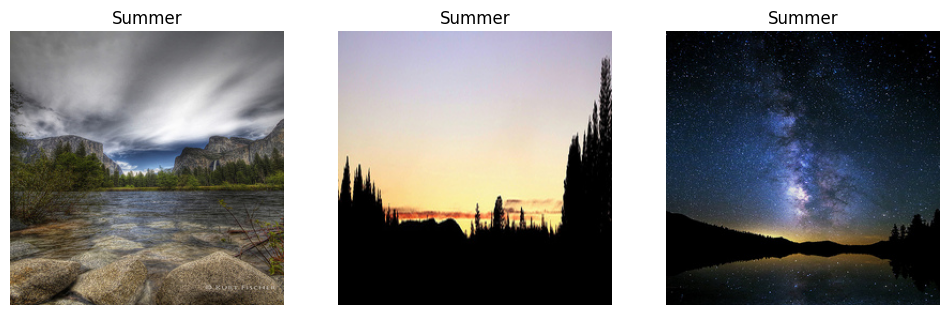

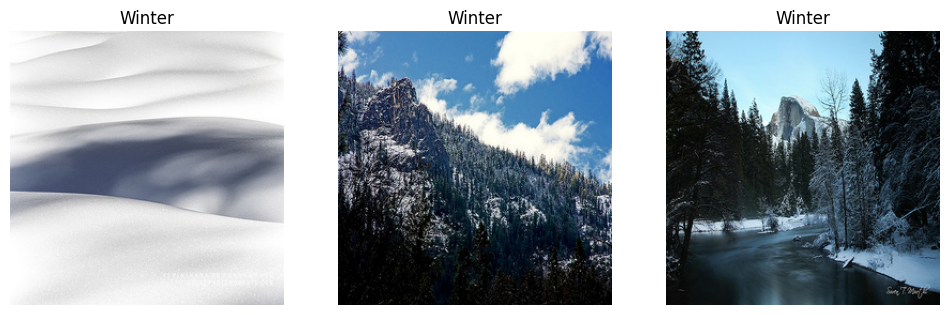

In [29]:
show_random_images('drive/MyDrive/Summer2Winter/dataset/trainA', "Summer")
show_random_images('drive/MyDrive/Summer2Winter/dataset/trainB', "Winter")

In [34]:
trainA_path = 'drive/MyDrive/Summer2Winter/dataset/trainA'
trainA_images = os.listdir(trainA_path)
sample_img = Image.open(os.path.join(trainA_path, trainA_images[0]))
print("Image size:", sample_img.size)

Image size: (256, 256)


In [35]:
def check_corrupted_images(folder_path):
    for img_name in os.listdir(folder_path):
        try:
            img_path = os.path.join(folder_path, img_name)
            img = Image.open(img_path)
            img.verify()
        except:
            print("Corrupted image found:", img_name)

In [36]:
trainB_path = 'drive/MyDrive/Summer2Winter/dataset/trainB'

check_corrupted_images(trainA_path)
check_corrupted_images(trainB_path)